In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

import time


In [ ]:
# - grid file
gridfile = '/Users/annasommer/Documents/Work_Grenoble/Data/eNatl60/coordinates_eNATL60.nc'
gridfile_ORCA1 = '/Users/annasommer/Documents/Work_Grenoble/Data/ORCA_Grid/IPSLCM6ALR_eORCA1.2_mesh_mask.nc'

# - Define read data function
def read_datagrid(gridfile,latmin=None,latmax=None,lonmin=None,lonmax=None):
    """Return navlon,navlat."""
    ncfile = Dataset(gridfile,'r')
    # load navlon and navlat
    _navlon = ncfile.variables['glamt'][:,:]
    _navlat = ncfile.variables['gphit'][:,:]
    #-Define domain
    domain = (lonmin<_navlon) * (_navlon<lonmax) * (latmin<_navlat) * (_navlat<latmax)
    where = np.where(domain)
    vlats = _navlat[where]
    vlons = _navlon[where]
    #get indice
    jmin = where[0][vlats.argmin()]
    jmax = where[0][vlats.argmax()]
    imin = where[1][vlons.argmin()]
    imax = where[1][vlons.argmax()]
    #load arrays
    navlon = _navlon[jmin:jmax+1,imin:imax+1]
    navlat = _navlat[jmin:jmax+1,imin:imax+1]
    return navlon,navlat,jmin,jmax,imin,imax

def read_datagrid_ORCA1(gridfile,latmin=None,latmax=None,lonmin=None,lonmax=None):
    """Return navlon,navlat."""
    ncfile = Dataset(gridfile,'r')
    # load navlon and navlat
    _navlon = ncfile.variables['nav_lon'][:,:]
    _navlat = ncfile.variables['nav_lat'][:,:]
    #-Define domain
    domain = (lonmin<_navlon) * (_navlon<lonmax) * (latmin<_navlat) * (_navlat<latmax)
    where = np.where(domain)
    vlats = _navlat[where]
    vlons = _navlon[where]
    #get indice
    jmin_ORCA = where[0][vlats.argmin()]
    jmax_ORCA = where[0][vlats.argmax()]
    imin_ORCA = where[1][vlons.argmin()]
    imax_ORCA = where[1][vlons.argmax()]
    #load arrays
    navlon_ORCA = _navlon[jmin_ORCA:jmax_ORCA+1,imin_ORCA:imax_ORCA+1]
    navlat_ORCA = _navlat[jmin_ORCA:jmax_ORCA+1,imin_ORCA:imax_ORCA+1]
    return navlon_ORCA,navlat_ORCA,jmin_ORCA,jmax_ORCA,imin_ORCA,imax_ORCA

#Define region
y1 = 32.5 
y2 = 41.5
x1 = -59.
x2 = -71.6

navlon_ORCA,navlat_ORCA,jmin_ORCA,jmax_ORCA,imin_ORCA,imax_ORCA = read_datagrid_ORCA1(gridfile_ORCA1,latmin=y1,latmax=y2,lonmin=x2,lonmax=x1)

# - Define box dimensions
a = (np.shape(navlon_ORCA)[0]-2.)*(np.shape(navlat_ORCA)[1]-2.)
Box_arr = np.empty((int(a),6),dtype=np.dtype('U100'))
print(a)

ii = 0
jj = 0
for i in np.arange(0,int(a),1):
    delta_lat1 = np.abs(navlat_ORCA[ii+1,jj] - navlat_ORCA[ii,jj])/2.
    delta_lat2 = np.abs(navlat_ORCA[ii+2,jj] - navlat_ORCA[ii+1,jj])/2.
    delta_lon1 = np.abs(navlon_ORCA[ii,jj+1] - navlon_ORCA[ii,jj])/2.
    delta_lon2 = np.abs(navlon_ORCA[ii,jj+2] - navlon_ORCA[ii,jj+1])/2.    
    Box_arr[i,:] = [str(navlat_ORCA[ii,jj]+delta_lat1),str(navlat_ORCA[ii+1,jj]+delta_lat2),str(navlon_ORCA[ii,jj]+delta_lon1),str(navlon_ORCA[ii,jj+1]+delta_lon2),'Box_'+str(i),str(i)]
    ii = ii + 1
    if ii >= int(np.shape(navlon_ORCA)[0])-2:
        ii = 0
        jj = jj + 1

name = Box_arr[:,4]

#- defining dictionaries for the boxes
class box: # empty container.
    def __init__(self,name=None):
        self.name = name
        return

dictboxes = {}

for i in np.arange(0,int(a),1):

    y1 = float(Box_arr[i,0]); y2 = float(Box_arr[i,1]);
    x2 = float(Box_arr[i,2]); x1 = float(Box_arr[i,3]);
    box_name = Box_arr[i,4]
    print(box_name)
    
    # - Obtain navlon and Navlat
    navlon,navlat,jmin,jmax,imin,imax = read_datagrid(gridfile,latmin=y1,latmax=y2,lonmin=x2,lonmax=x1)
    
    # - save box parameter
    abox = box(box_name)
    abox.lonmin = navlon.min()
    abox.lonmax = navlon.max()
    abox.latmin = navlat.min()
    abox.latmax = navlat.max()
    abox.navlon = navlon
    abox.navlat = navlat
    abox.imin = imin
    abox.imax = imax
    abox.jmin = jmin
    abox.jmax = jmax
    abox.nb = int(Box_arr[i,5])#ibox[5]
    dictboxes[box_name] = abox
    
boxes = dictboxes.values()

110.0
Box_0
Box_1
Box_2
Box_3
Box_4
Box_5
Box_6
Box_7
Box_8
Box_9
Box_10
Box_11
Box_12
Box_13
Box_14
Box_15
Box_16
Box_17
Box_18
Box_19
Box_20
Box_21
Box_22
Box_23
Box_24
Box_25
Box_26
Box_27
Box_28
Box_29
Box_30
Box_31
Box_32
Box_33
Box_34
Box_35
Box_36
Box_37
Box_38
Box_39
Box_40
Box_41
Box_42
Box_43
Box_44
Box_45
Box_46
Box_47
Box_48
Box_49
Box_50
Box_51
Box_52
Box_53
Box_54
Box_55
Box_56
Box_57
Box_58
Box_59
Box_60
Box_61
Box_62
Box_63
Box_64
Box_65
Box_66
Box_67
Box_68
Box_69
Box_70
Box_71
Box_72
Box_73
Box_74
Box_75
Box_76
Box_77
Box_78
Box_79
Box_80
Box_81
Box_82
Box_83
Box_84
Box_85
Box_86
Box_87
Box_88
Box_89


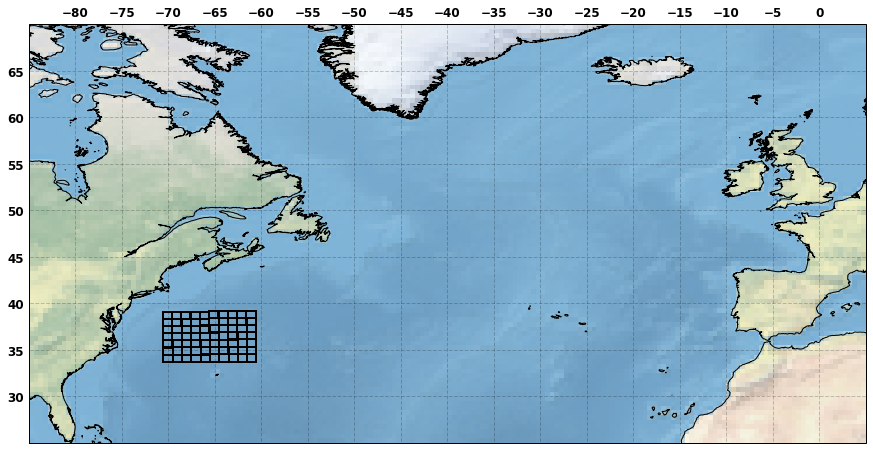

In [3]:
transform = ccrs.PlateCarree()

pltargs = {
   'transform' : transform,
   'color' : 'black',
   'linewidth' : 2}

def plot_individual_box(box,ax=None):
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],**pltargs)
    ax.plot([x1, x2], [y2, y2],**pltargs)
    ax.plot([x1, x1], [y1, y2],**pltargs)
    ax.plot([x2, x2], [y1, y2],**pltargs)
    #ax.text(x1+0.1,y1+0.1,box.nb)


def plot_boxes(boxlist,textbox=None,title=None):
    plt.figure(figsize=(15,10))
    proj = transform
    ax = plt.axes(projection=proj)
    ax.stock_img()
    for box in boxlist:
        plot_individual_box(box,ax=ax)
    ax.coastlines(resolution="10m")

    # grid lines
    gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,10,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(20,80,5,dtype=float))


    #ax.grid(False)
    plt.xlim((-85,5))
    plt.ylim((25,70))
    if textbox is not None:
        # see http://matplotlib.org/users/annotations_guide.html
        props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor="black", lw=2)
        ax.text(0.05, 0.10, textbox, transform=ax.transAxes, fontsize=18,verticalalignment='top',bbox=props)
    if title is not None:
        plt.title(title,fontsize=20,y=1.08)

       
plot_boxes(boxes,textbox=None,title=None)
plt.savefig('test_map_boxes_1x1_GS.png')